In [8]:
import cv2

In [9]:
vid = cv2.VideoCapture(0)

In [ ]:
while True:
    try:
        res, frame = vid.read()
        #vid.read() gives two value res(boolean) and frame
        cv2.imshow('frame',frame)
    
    except:
        pass

    count = 0

    # while loop is printing 100 frame, if not controlled it will crash and will not stop

    # while count < 100:
    #     res, frame = vid.read()
    #     cv2.imshow("Frame", frame)
    #     cv2.waitKey(1)
    #     count += 1
    
    # break

    """we can use method in below as well where pressing q will stop the continous frame show """

    if cv2.waitKey(1) & 0xff==ord('q'):
        break

cv2.destroyAllWindows()

Edge Detection

In [17]:
img = cv2.imread("batman.jpg")
img = cv2.resize(img,(840,490))

In [16]:
cv2.imshow("Batman",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
cv2.imshow('Batman',gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
canny_img = cv2.Canny(gray_img,150,200)

In [21]:
cv2.imshow("Batman",canny_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
vid = cv2.VideoCapture("seoul.mp4")

In [ ]:
while True:
    try:
        res,frame = vid.read()
        gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        canny_frame = cv2.Canny(gray_frame,150,200)
        cv2.imshow("video",canny_frame)
    
    except:
        pass

    if cv2.waitKey(1) & 0xff==ord('q'):
        break

cv2.destroyAllWindows()

erosion and Dialation

In [7]:
import cv2
import numpy as np
kernel = np.ones((4,4), np.uint8)

In [8]:
img = cv2.imread("batman.jpg")
img = cv2.resize(img,(840,490))
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny_img = cv2.Canny(gray_img,150,200)

In [9]:
# erode is a function of cv2 which clear out noise in edged/canny image

erode_img = cv2.erode(canny_img, kernel, iterations=1)

In [10]:
cv2.imshow("erode_img",erode_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
dil_img = cv2.dilate(canny_img,kernel,iterations=1)

In [12]:
cv2.imshow("dilated_img",dil_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Drawing Shapes

In [1]:
import cv2

In [2]:
import numpy as np

In [15]:
blank = np.zeros((500,500,3), dtype= 'uint8')

In [4]:
from matplotlib import pyplot as plt

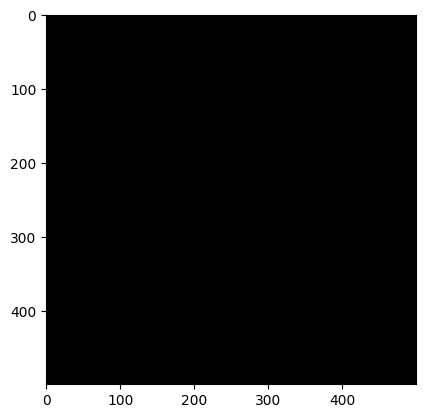

In [16]:
plt.imshow(blank)

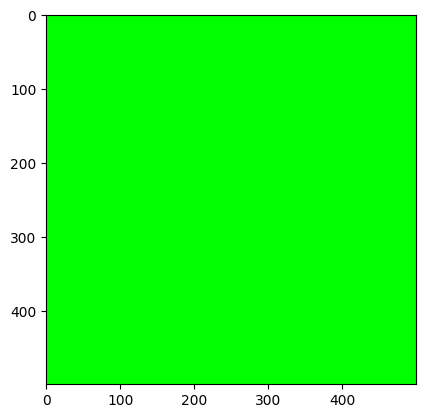

In [6]:
blank[:] = (0,255,0)
plt.imshow(blank)

Drawing Rectangle

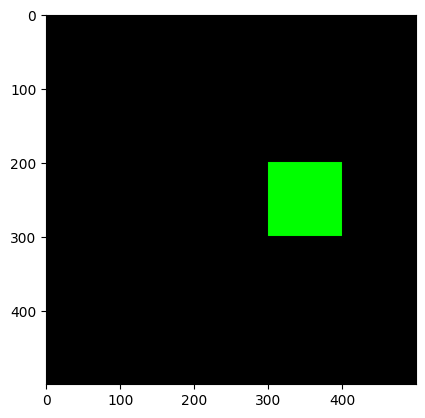

In [18]:
blank[200:300,300:400] = (0,255,0)
plt.imshow(blank)

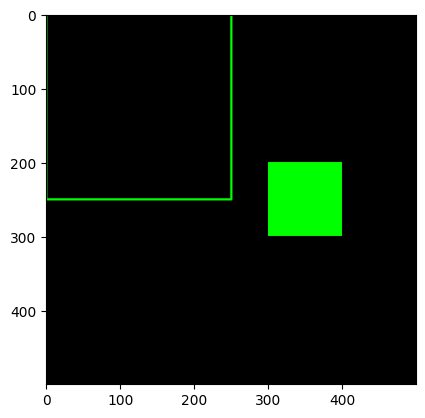

In [21]:
rect = cv2.rectangle(blank, (0,0), (250,250), (0,255,0), thickness = 2)
plt.imshow(rect)

Draw Circle

In [29]:
bz = np.zeros((500,500,3), dtype = 'uint8')
cir = cv2.circle(bz, (bz.shape[0]//2, bz.shape[1]//2), 50, (0,0,255), thickness=5)

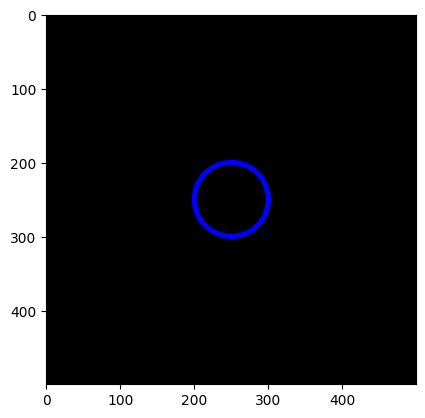

In [30]:
plt.imshow(bz)

Drawing Line

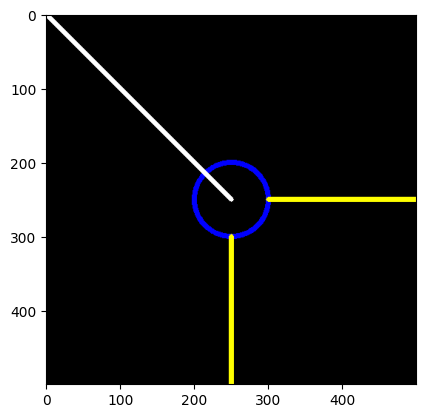

In [32]:
line_1 = cv2.line(bz, (0,0), (bz.shape[0]//2,bz.shape[1]//2),(255,255,255), thickness=5)
line_2 = cv2.line(bz,(250,300),(250,500),(255,255,0),thickness=5)
plt.imshow(line_1)
plt.imshow(line_2)


Text Insertion

In [36]:
bm = np.zeros((500,500,3),dtype = 'uint8')

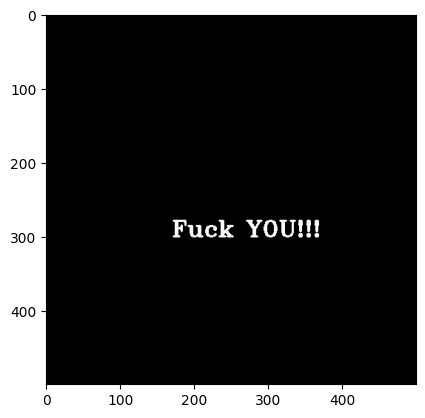

In [ ]:
text = cv2.putText(bm,"Fuck YOU!!!", (170,300), cv2.FONT_HERSHEY_TRIPLEX, 1.0, (250,250,250),thickness=1.5)
plt.imshow(text)

Color Detection

In [21]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [22]:
web = cv2.VideoCapture(0)

In [23]:
while True:
    res, frame = web.read()
    if not res:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_red1 = np.array([0, 120, 70], np.uint8)
    upper_red1 = np.array([10, 255, 255], np.uint8)

    lower_red2 = np.array([170, 120, 70], np.uint8)
    upper_red2 = np.array([179, 255, 255], np.uint8)

    mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
    mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    redM = mask1 + mask2

    kernel = np.ones((5, 5), np.uint8)
    redM = cv2.dilate(redM, kernel)

    res_red = cv2.bitwise_and(frame, frame, mask=redM)

    contours, hierarchy = cv2.findContours(redM, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(frame, "Red Colour", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

    # Green Color

    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, "Green Colour", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("Green Color Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('t'):
        break

web.release()
cv2.destroyAllWindows()

In [13]:
while True:
    res, frame = web.read()
    if not res:
        break

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    mask = cv2.inRange(hsv, lower_green, upper_green)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.dilate(mask, kernel, iterations=1)

    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)

        if area > 300:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(frame, "Green Colour", (x, y-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    cv2.imshow("Green Color Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('t'):
        break

web.release()
cv2.destroyAllWindows()

Face Recognition

In [24]:
import cv2
import numpy as np
import os
import PIL as Image

In [25]:
def create_user(f_id,name):
    web = cv2.VideoCapture(0)
    web.set(3,640)
    web.set(4,480)

    faces = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    f_dir = 'dataset'
    f_name = name
    path = os.path.join(f_dir, f_name)
    if not os.path.isdir(path):
        os.mkdir(path)
    counter = 0
    while True:
        ret, img = web.read()
        img = cv2.flip(img,1)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        multi_face = faces.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in multi_face:
            cv2.rectangle(img, (x,y), (x+w, y+h),(255,0,0),2)
            counter += 1
            cv2.imwrite("{}/{}.{}.{}{}".format(path, name, f_id, counter, ".jpg"), gray[y:y+h, x:x+w])
            cv2.imshow("Image",img)
        k = cv2.waitKey(100) & 0xff
        if k == 27:
            break
        elif count>=40:
            break
    web.release()
    cv2.destroyAllWindows()



In [ ]:
create_user(1,"Pepcoding")